In [1]:
import sys
import os

sys.path.append("../..")

from omegaconf import OmegaConf
from sdofm.datasets.SDOML import SDOMLDataModule, SDOMLDataset
from sdofm.datasets.RandomIntervalSDOML import (
    RandomIntervalSDOMLDataset,
    RandomIntervalSDOMLDataModule,
)
from sdofm.datasets.BrightSpotsSDOML import (
    BrightSpotsSDOMLDataset,
    BrightSpotsSDOMLDataModule,
)
from rlxutils import subplots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from sdofm.utils import stonyhurst_to_patch_index
from progressbar import progressbar as pbar
from sdofm.constants import ALL_COMPONENTS, ALL_WAVELENGTHS, ALL_IONS
from rlxutils import ElapsedTimes
import torch

In [2]:
cfg = OmegaConf.load("../../experiments/default.yaml")

In [3]:
data_module = BrightSpotsSDOMLDataModule(
    # hmi_path=os.path.join(
    #     self.cfg.data.sdoml.base_directory, self.cfg.data.sdoml.sub_directory.hmi
    # ),
    hmi_path=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.hmi,
    ),
    aia_path=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.aia,
    ),
    eve_path=None,
    components=cfg.data.sdoml.components,
    wavelengths=cfg.data.sdoml.wavelengths,
    ions=cfg.data.sdoml.ions,
    frequency=cfg.data.sdoml.frequency,
    batch_size=4,
    num_workers=10,
    blosc_cache="/home/rlx/blosc_cache",
    start_date="2010-01-01",
    end_date="2010-12-31",
    val_months=cfg.data.month_splits.val,
    test_months=cfg.data.month_splits.test,
    holdout_months=cfg.data.month_splits.holdout,
    cache_dir=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.cache,
    ),
)
data_module.setup()

[* CACHE SYSTEM *] Found cached index data in /mnt/sdoml/cache/aligndata_AIA_FULL_HMI_FULL_12min.csv.
[* CACHE SYSTEM *] Found cached normalization data in /mnt/sdoml/cache/normalizations_AIA_FULL_HMI_FULL_12min.json.
[* CACHE SYSTEM *] Found cached HMI mask data in /mnt/sdoml/cache/hmi_mask_512x512.npy.


In [4]:
ds = data_module.train_ds

In [16]:
b = ds[1000]

In [17]:
image_stack = b["image_stack"]
bright_spots = b["bright_spots"]

In [18]:
image_stack.shape, bright_spots.shape

((12, 512, 512), (12, 512, 512))

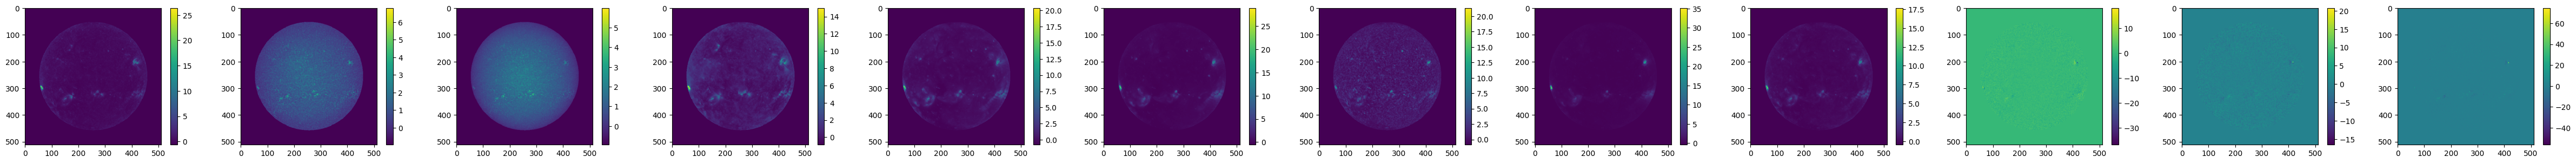

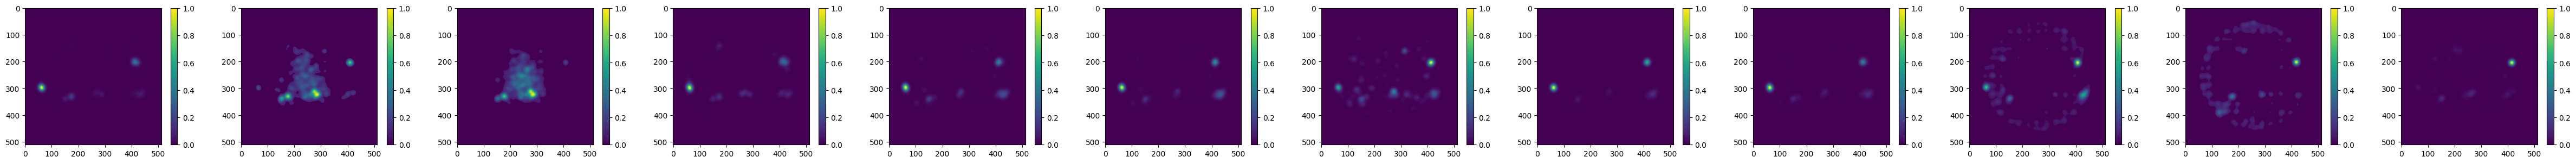

In [19]:
for ax, i in subplots(len(image_stack), usizex=4):
    plt.imshow(image_stack[i])
    plt.colorbar()

for ax, i in subplots(len(bright_spots), usizex=4):
    plt.imshow(bright_spots[i])
    plt.colorbar()

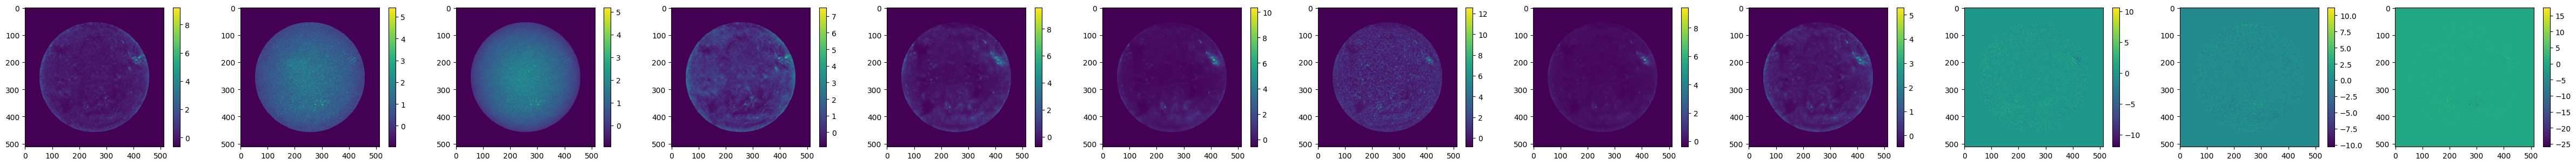

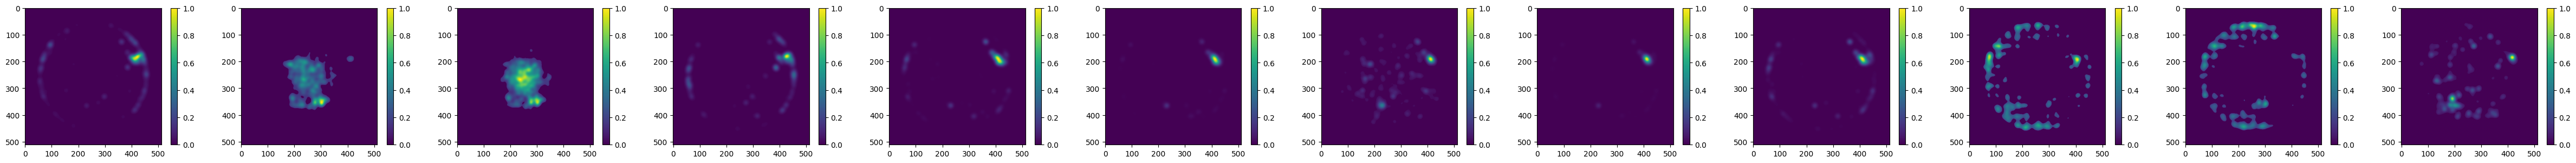

In [15]:
for ax, i in subplots(len(image_stack), usizex=4):
    plt.imshow(image_stack[i])
    plt.colorbar()

for ax, i in subplots(len(bright_spots), usizex=4):
    plt.imshow(bright_spots[i])
    plt.colorbar()

In [4]:
dltrain = data_module.train_dataloader()

for batch in dltrain:
    print(".", end="")
    if np.random.random() < 0.01:
        break

AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/envs/sdofm/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/envs/sdofm/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/envs/sdofm/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/rlx/SDO-FM/notebooks/fm-brightspots/../../sdofm/datasets/BrightSpotsSDOML.py", line 166, in __getitem__
    if self.dim:
AttributeError: 'BrightSpotsSDOMLDataset' object has no attribute 'dim'
